# <font color='blue'> Week 3 _Activity</font>


In [3]:
#importing dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##  1. Write a python program to create an array and covert to a desired dimension, as shown in picture.
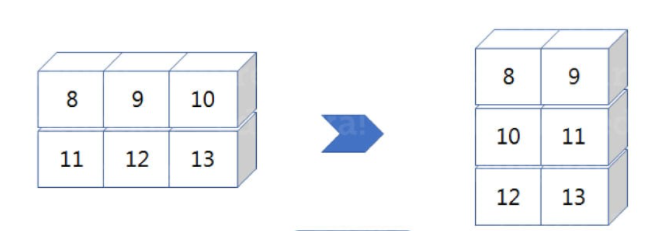

### Numpy array creation

In [165]:
#numpy array creation
arr1 = np.array([[8,9,10],[11,12,13]])
arr1

array([[ 8,  9, 10],
       [11, 12, 13]])

### Reshaping the Numpy Array

In [22]:
#using reshape, we can reshape the array to any other shape, such that all elements are included
#as given in question, we reshape (2,3) to (3,2) array
reshaped_arr = arr1.reshape(3,2)
reshaped_arr

array([[ 8,  9],
       [10, 11],
       [12, 13]])

## 2. Create an array and extract particular set of elements from an array as shown in the picture.
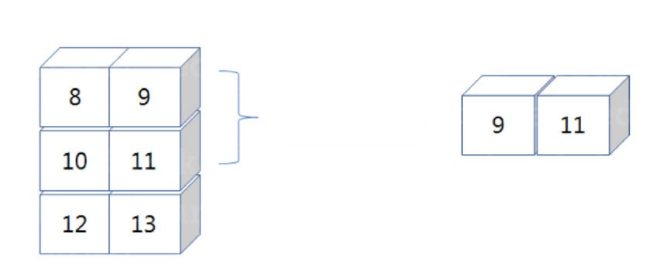

### Numpy array creation

In [17]:
#numpy array creation
arr2 = np.array([[8,9],[10,11],[12,13]])
arr2

array([[ 8,  9],
       [10, 11],
       [12, 13]])

### Slicing the required elements 

In [18]:
#the required elements are 9 and 11 
#9 is the 2nd element of first row and 11 is the 2nd element of 2nd row

extracted_arr = arr2[[0,1],[1,1]]
print("Extracted Array :\n ",extracted_arr,"\n")

Extracted Array :
  [ 9 11] 



In [36]:
extracted_arr.ndim
#we see that the extracted array is a 1-D Numpy Array.

1

## 3. Create a dataframe as shown below.
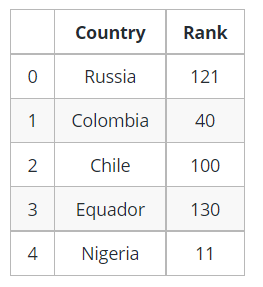

In [12]:
#we pass the data to a dict with keys as the col names and values as the entries.
rank_dict = {'Country':['Russia','Colombia','Chile','Equador','Nigeria'],'Rank':[121,40,100,130,11]}
#pass the dict to the dataframe
rank_df = pd.DataFrame(rank_dict)
rank_df

,Country,Rank
0,Russia,121
1,Colombia,40
2,Chile,100
3,Equador,130
4,Nigeria,11


## 4. Read the given data set and answer the following questions. Show the steps taken to produce your final answer.

1. Display the Glucose level and the Age for the samples having the index ranging from 45 to 60.
2. How many patients in the data are having the blood pressure level above 120?
3. Find the minimum and maximum value of insulin level in the data.
4. Create a histogram of "Age".
5. Create a scatter plot of "BMI" vs "Glucose".

### Loading Dataset to DataFrame

In [6]:
diab_df = pd.read_csv('diabetes_model.csv')

#displaying last 5 rows
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,77,82,41,42,35.8,0.156,35,0
1,9,122,56,0,0,33.3,1.114,33,1
2,0,113,76,0,0,33.3,0.278,23,1
3,1,139,62,41,480,40.7,0.536,21,0
4,10,161,68,23,132,25.5,0.326,47,1


### Q.1 Display the Glucose level and the Age for the samples having the index ranging from 45 to 60.

In [72]:
#indexing the dataframe using iloc - method1
#we access the Glucose and Age columns of the main df
#then we slice out the required index using iloc method

diab_df[['Glucose','Age']].iloc[45:60]

,Glucose,Age
45,137,21
46,145,70
47,113,22
48,96,27
49,131,26
50,113,21
51,120,34
52,95,24
53,155,46
54,100,46


In [74]:
#another variation of the above method
#storing the required data with first 100 rows to a df

df1 = diab_df[['Glucose','Age']].head(100)

#now we access required data from df1
df1.iloc[45:60]

,Glucose,Age
45,137,21
46,145,70
47,113,22
48,96,27
49,131,26
50,113,21
51,120,34
52,95,24
53,155,46
54,100,46


In [69]:
#indexing the dataframe using loc method
#we index the main df using row slicing with given Index Range and col slicing with Column Name
#Here, we get 60th index included - because loc method is stop bound inclusive

diab_df.loc[45:60,['Glucose','Age']]

,Glucose,Age
45,137,21
46,145,70
47,113,22
48,96,27
49,131,26
50,113,21
51,120,34
52,95,24
53,155,46
54,100,46


### Q.2 How many patients in the data are having the blood pressure level above 120?

In [115]:
#filtering out the df by 'BloodPressure'>120
diab_df[diab_df['BloodPressure']>120]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
48,1,96,122,0,0,22.4,0.207,27,0


In [144]:
diab_df[diab_df['BloodPressure']>120].index

Int64Index([48], dtype='int64')

In [11]:

# Getting data of patients with Blood pressure level above 120
dia_Data2=diab_df['BloodPressure']>120
print('Patients with Blood pressure level above 120 :',dia_Data2.sum())

Patients with Blood pressure level above 120 : 1


In [10]:
#another way to check the count 
diab_df.BloodPressure.value_counts().sort_index(ascending=False)

122     1
114     1
110     3
108     1
106     3
104     1
102     1
100     3
98      3
96      2
95      1
94      6
92      6
90     16
88     24
86     17
85      6
84     19
82     22
80     34
78     35
76     32
75      7
74     38
72     38
70     42
68     38
66     22
65      7
64     31
62     30
61      1
60     26
58     19
56     10
55      2
54      9
52     10
50     11
48      2
46      1
44      3
40      1
38      1
30      2
24      1
0      25
Name: BloodPressure, dtype: int64

**we see that only one patient with index number 48 has BP greater than 120 (BloodPressure is 122)**

### Q.3. Find the minimum and maximum value of insulin level in the data.

In [8]:
print("Minimum value of Insulin level - ",diab_df['Insulin'].min())
print("Maximum value of Insulin level -",diab_df['Insulin'].max())

Minimum value of Insulin level -  0
Maximum value of Insulin level - 846


In [149]:
diab_df['Insulin'].idxmax()

431

In [9]:
diab_df['Insulin'].idxmin()

1

**The max value is present in the 431th index position**

**The first occurrence of min value is present in the 1st index position**

### Q.4. Create a histogram of "Age".


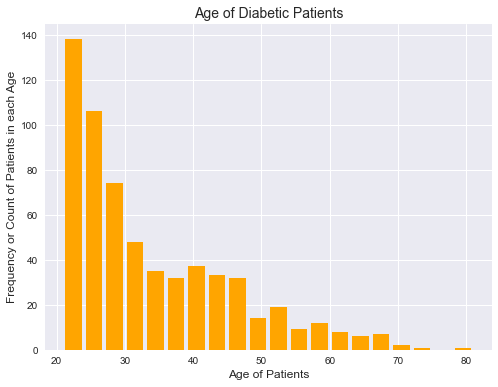

In [162]:
#histogram using plt method
plt.figure(figsize=(8,6))
# Defining data to plot the Histogram along with visual enhancements (Color & Adj.Bar width)
plt.hist(diab_df['Age'],color='Orange',rwidth=0.8,bins=20)
# Giving Histogram Title
plt.title("Age of Diabetic Patients",fontsize=14)
plt.xlabel("Age of Patients",fontsize=12)
# Giving markings in both axises
plt.ylabel("Frequency or Count of Patients in each Age",fontsize=12)
plt.xticks()
plt.yticks()
plt.show()

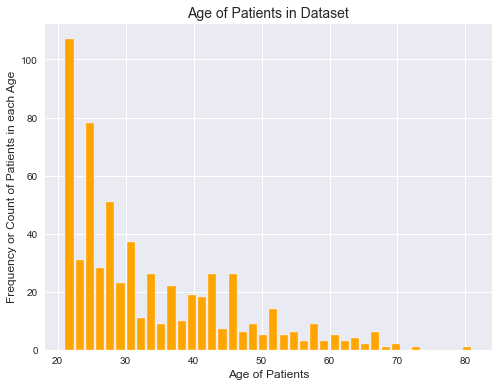

In [169]:
#histogram with more binning of data [bins=40]
plt.figure(figsize=(8,6))
plt.hist(diab_df['Age'],color='Orange',rwidth=0.8,bins=40)
plt.title("Age of Patients in Dataset",fontsize=14)
plt.xlabel("Age of Patients",fontsize=12)
plt.ylabel("Frequency or Count of Patients in each Age",fontsize=12)
plt.xticks()
plt.yticks()
plt.show()

#### Observation:
* Most number entries in the dataset belong to the age group between 20 to 30.
* There is very less entries between age group 70 to 80.


### Q.5. Create a scatter plot of "BMI" vs "Glucose".

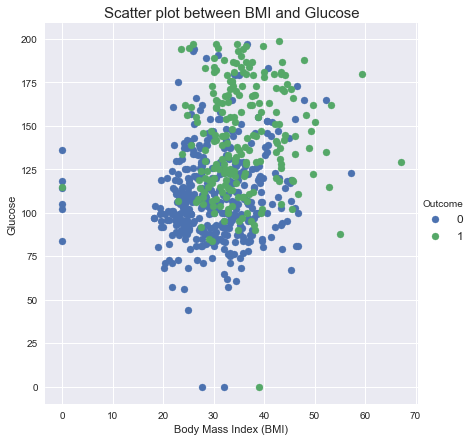

In [166]:
sns.set_style("darkgrid");
sns.FacetGrid(diab_df, hue="Outcome", height=6)\
   .map(plt.scatter, "BMI", "Glucose") \
   .add_legend(fontsize=12)
plt.title("Scatter plot between BMI and Glucose", fontsize =15)
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Glucose")
plt.show()

#### Observation:
* The overlapping of the points shows that there is no significant connection between Glucose and BMI in Diabetic and Non-Diabetic Patients.


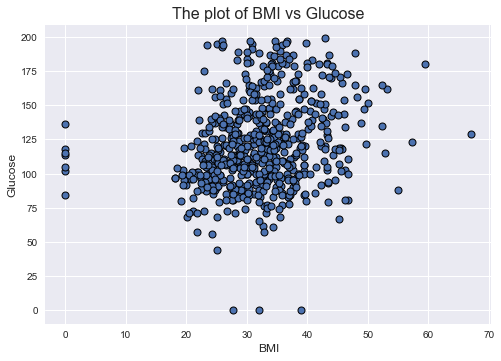

In [7]:
#another method - code by Sidharth
# Create a scatter plot of "BMI" vs "Glucose"
plt.style.use('seaborn')
x=diab_df['BMI']
y=diab_df['Glucose']
plt.scatter(x,y,edgecolor='black',linewidth=1)
plt.title('The plot of BMI vs Glucose',fontsize=16)
plt.xlabel('BMI',fontsize=12)
plt.ylabel('Glucose',fontsize=12)
plt.show()

In [1]:
#Submitted by DSA_B3_GROUP12
#GroupMembers: Sujith Narayanan, Sidharth S, Akshaya V, Shiffa Saleem, Navaneeth R

<center><h2> - END - </h2></center>